Task: Predict car prices based on features

Sub Tasks:
- Clean data, Summary and Visualizations
- Identify relevant features (both categorical and numerical)
- Create model
- Perform model performance evaluation
- Better Techniques

In [1]:
import pandas as pd # for dataframes
import numpy as np # for arrays
import seaborn as sns # for plots
from matplotlib import pyplot as plt # for plots
import statsmodels.api as sm # for regression
from sklearn.model_selection import train_test_split # for regression
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Import Data

In [2]:
cars = pd.read_csv("CarsData.csv")

#### Data Cleaning, Summary and Visualizations

#### Data Summary

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Inference: Data is has no NULL or NAs that we need to worry about

In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Data Cleaning

Insight: All names have company brand names at start separated by a ' ' so we can fetch the brand name as brand will dictate the final price of the car. More luxurious the brand, the costlier the car.

In [8]:
# Retreive brand name from 'CarName'
cars['CarName'] = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars['CarName']  = cars.CarName.str.lower()

Insight: There are some spelling inconsistencies as well. Like, 'maxda' and 'mazda'; 'porcshce' and 'porsche'; 'toyota' and 'toyouta'; 'vokswagen' and 'volkswagen'

In [9]:
# Correcting for spelling error
correct = ['mazda', 'porsche', 'toyota', 'volkswagen']
incorrect = ['maxda', 'porcshce', 'toyouta', 'vokswagen']
cars['CarName'].replace(incorrect, correct, inplace = True)

In [10]:
set(cars['CarName'])

{'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'vw'}

#### Data Visualizations

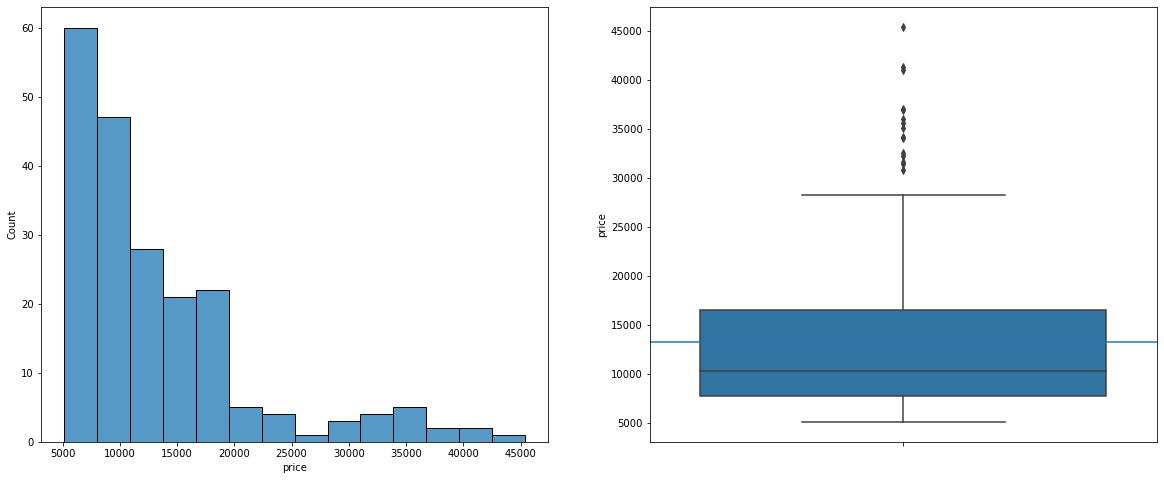

In [11]:
# Check distribution of label (price)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
graph1 = sns.histplot(data = cars, x = 'price')

plt.subplot(1,2,2)
graph2 = sns.boxplot(data = cars, y = 'price')
graph2.axhline(np.mean(cars['price']))

plt.show()

Insight: Plot is right-skewed. There are considerable number of values spread throughout, hence we do not need to take 'log' of price. We can considerable difference between mean and median. Variance is also high. The values are in range of 10000s so we will need to perform scaling later.

<AxesSubplot:xlabel='CarName', ylabel='price'>

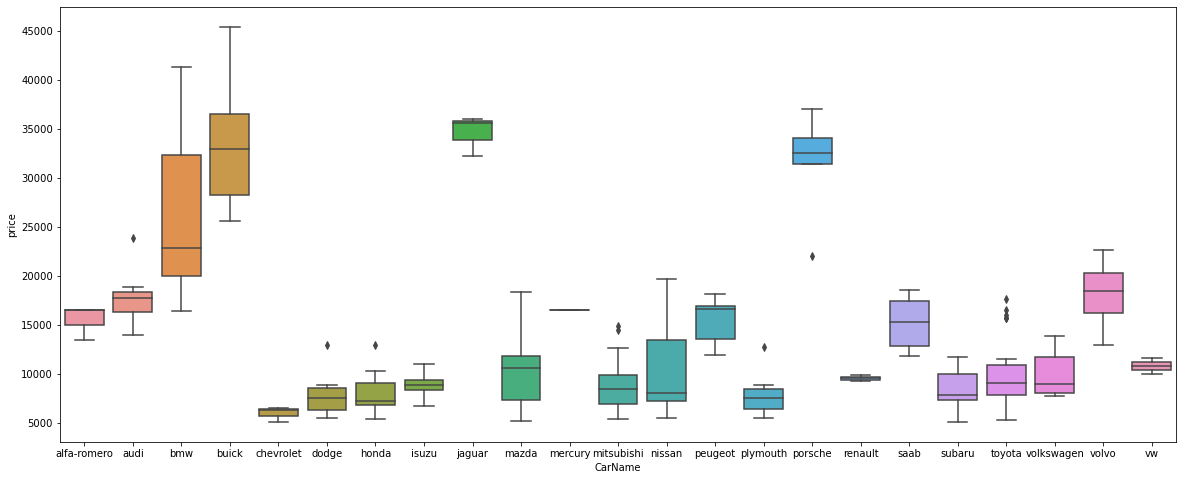

In [12]:
# Price Variation by Brand
plt.figure(figsize=(20,8))
sns.boxplot(data = cars, y = 'price', x = 'CarName', order = sorted(cars['CarName'].unique()))
# sns.catplot( data = cars, y = 'price', col = 'CarName', kind = 'box', col_wrap=6)

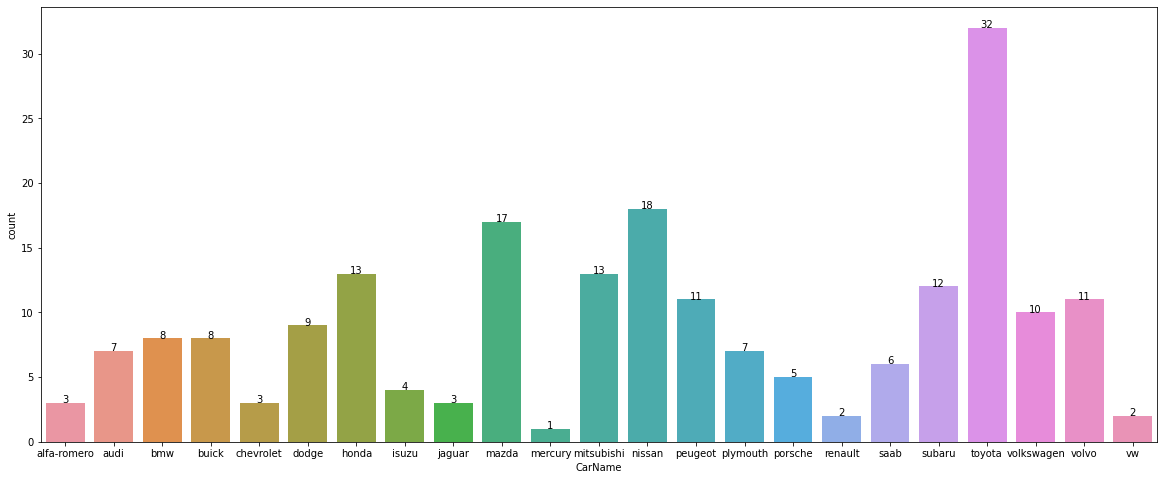

In [13]:
plt.figure(figsize=(20,8))
# sns.histplot(data = cars, x = 'CarName')
graph = sns.countplot(data = cars, x = 'CarName', order = sorted(cars['CarName'].unique()))
data_labels = cars['CarName'].value_counts().reset_index().sort_values('index')['CarName']
for index, i in enumerate(data_labels):
    graph.annotate(text = str(i), xy = (index, i), horizontalalignment = 'center')

Insight: From the above two graphs we can see that 'CarName' should be a significant parameter. Price shows great variation across brands. We have brands like jaguar and porsche with high prices and low sales and bmw which has high variation. This implies some car prices vary largely with the brand they are associated with and some do not.<br>
Also, do notice that our dataset is relatively small.

#### Price variation with respect to Categorical Variables

In [14]:
categorical_variables = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', \
                         'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
row_number = len(categorical_variables)
col_number = np.max([len(set(cars[value])) for value in categorical_variables])

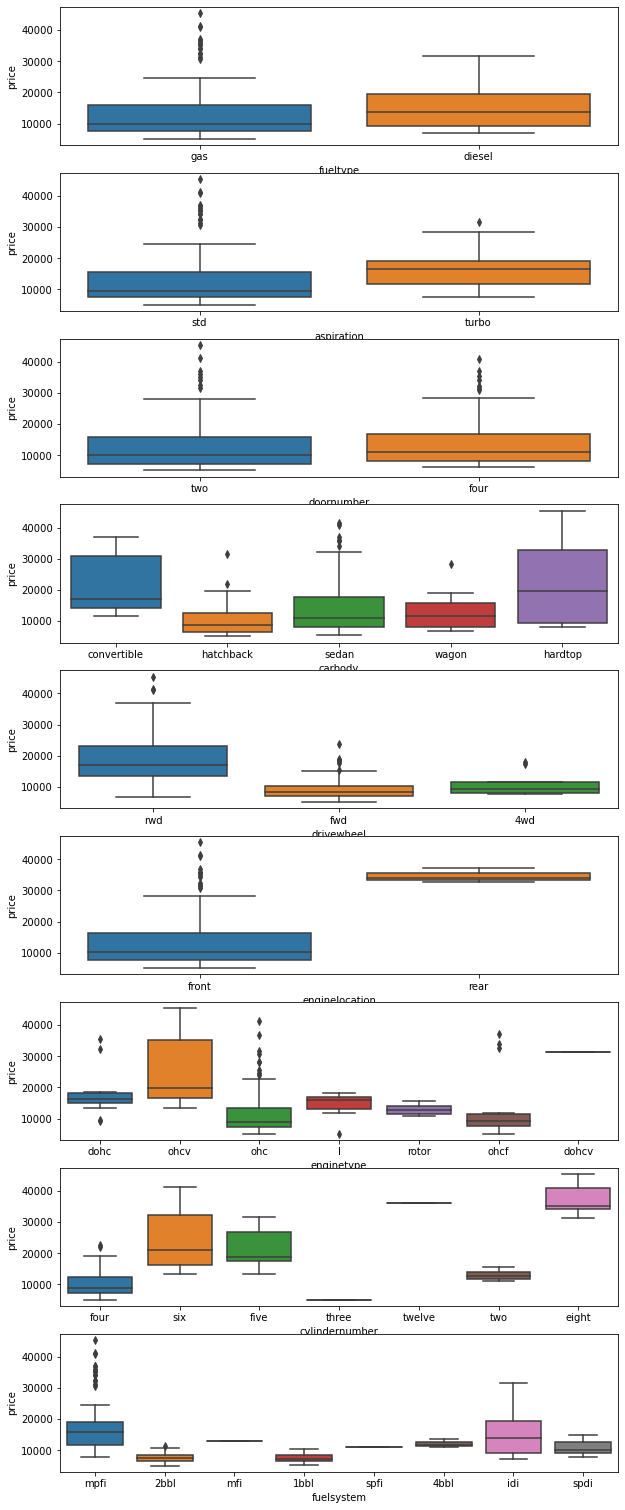

In [15]:
plt.figure(figsize=(10,30))
for index, value in enumerate(categorical_variables):
    if index == 0:
        continue
    plt.subplot(row_number,1,index+1)
    sns.boxplot(data = cars, y = 'price', x = value)

From the above boxplots, we can see that for categorical variables 'fueltype', 'aspiration', 'doornumber', variations in feature explain very little variation in label 'price'. Hence, we can drop these categorical variables.

In [16]:
drop_categorical = ['fueltype', 'aspiration', 'doornumber', 'variations']

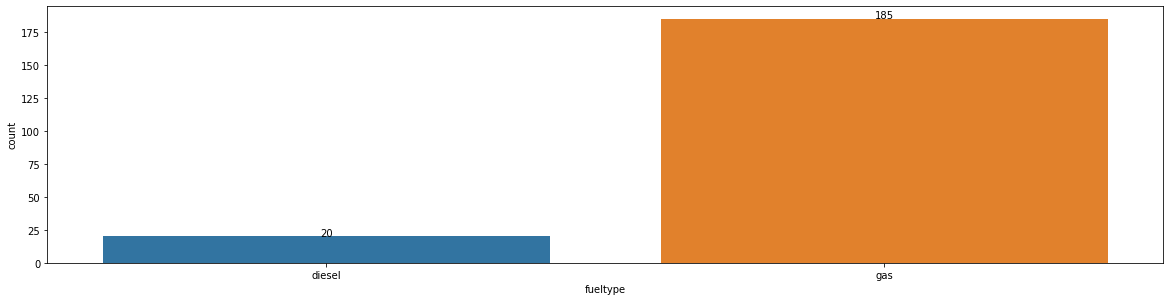

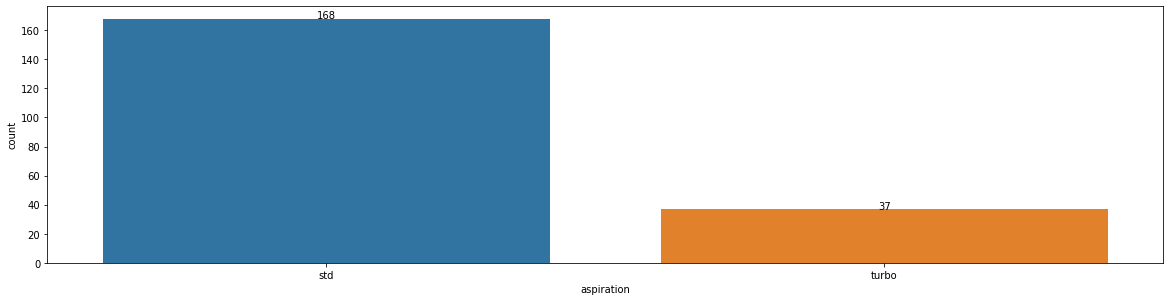

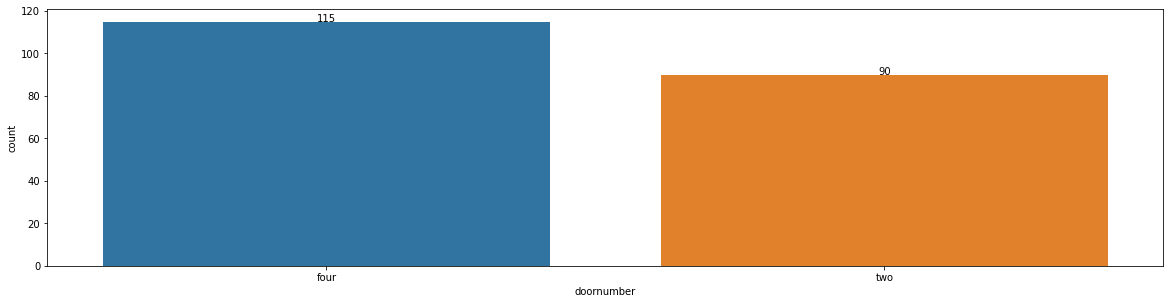

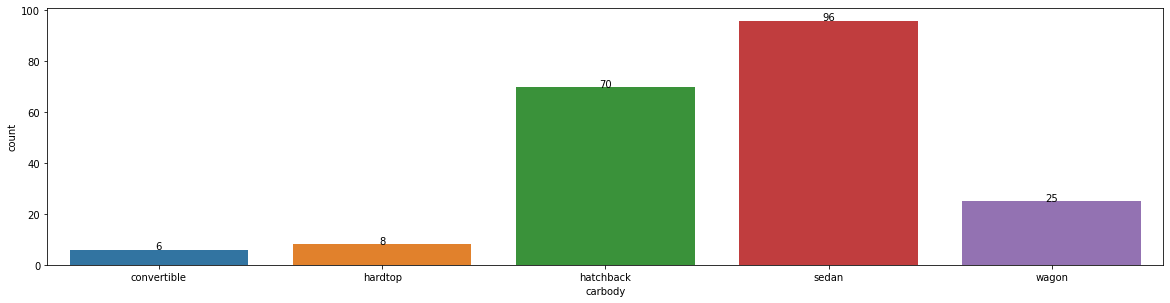

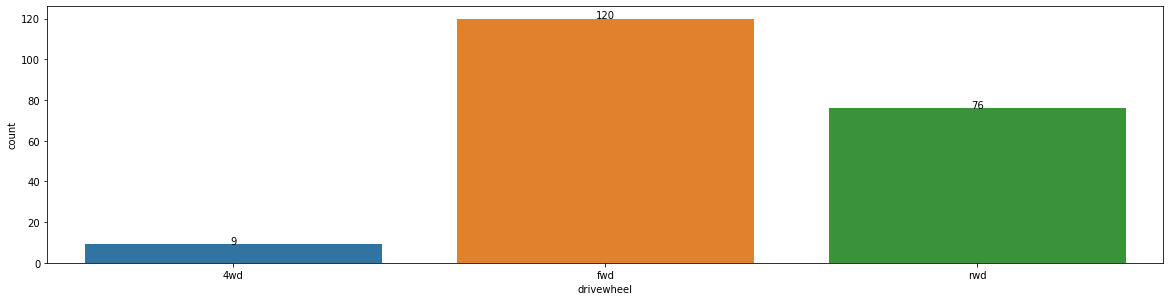

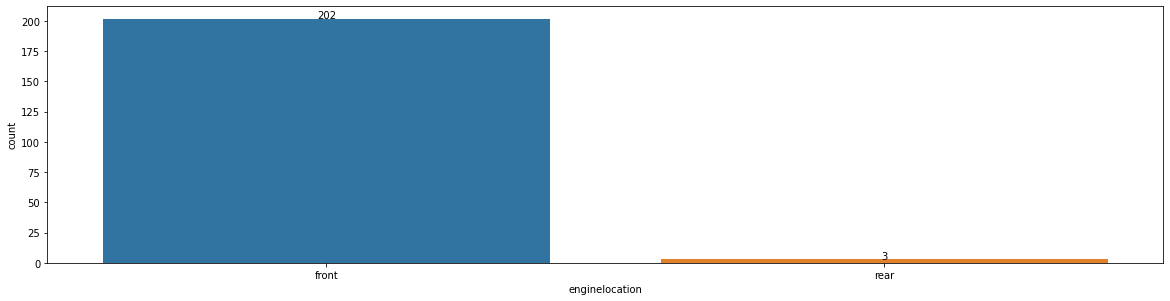

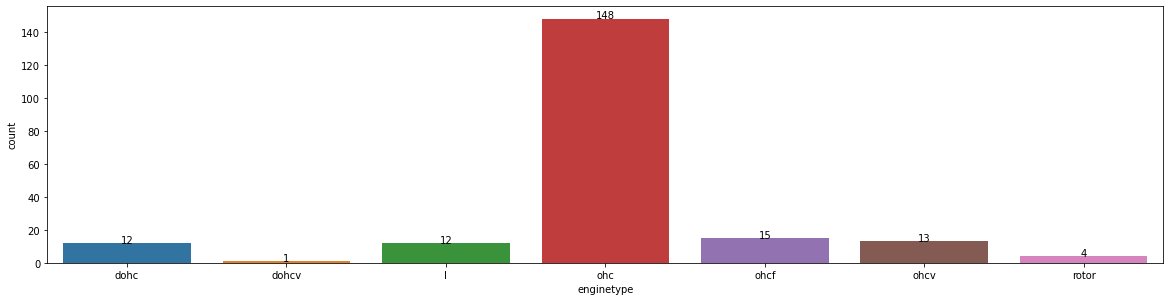

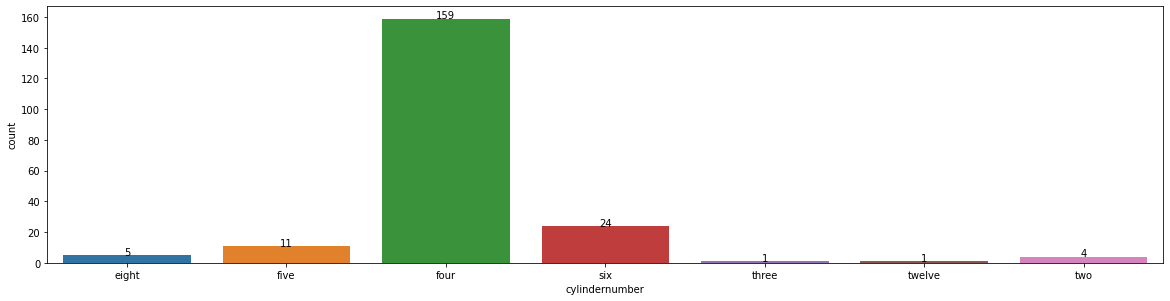

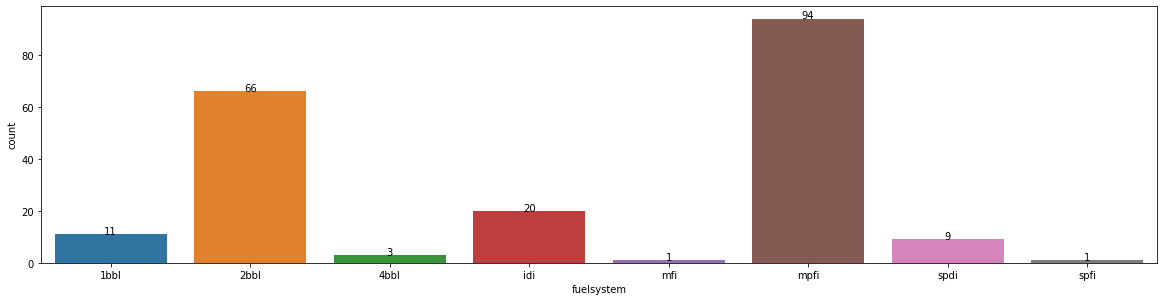

In [17]:
# Distribution of Categorical Variables
categorical_variables
for index, col_name in enumerate(categorical_variables):
    if col_name == 'CarName':
        continue
    plt.figure(figsize=(20,50))
    plt.subplot(len(categorical_variables)-1,1,index)
    graph = sns.countplot(data = cars, x = col_name, order = sorted(cars[col_name].unique()))
    data_labels = cars[col_name].value_counts().reset_index().sort_values('index')[col_name]
    for index, i in enumerate(data_labels):
        graph.annotate(text = str(i), xy = (index, i), horizontalalignment = 'center')


INSIGHT: For 'enginelocation' there are very few points to make an inference. Hence, this feature will be insignificant too. Since most data is for 'fromt' engine we cannot make a reliable estimate of price based on this feature. Hence, we can drop this as well.

In [18]:
# Updated Categorical Variables with insignificant features removed
categorical_variables = ['CarName', 'carbody', 'drivewheel', 'enginetype']

In [19]:
print(categorical_variables)
drop_categorical

['CarName', 'carbody', 'drivewheel', 'enginetype']


['fueltype', 'aspiration', 'doornumber', 'variations']

In [20]:
# Price Variation with respect to numerical variables
numerical_variables = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', \
                       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', \
                       'highwaympg']
row_number_var = len(numerical_variables)

In [21]:
def make_plot(value, index):
    plt.figure(figsize=(20,80))
    plt.subplot(len(numerical_variables), 2, index)
    sns.scatterplot(data = cars, y = 'price', x = value).set_title(value)

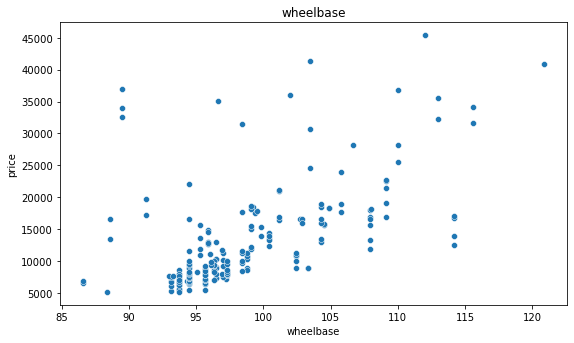

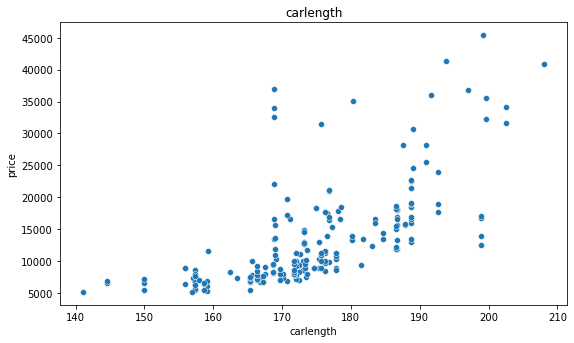

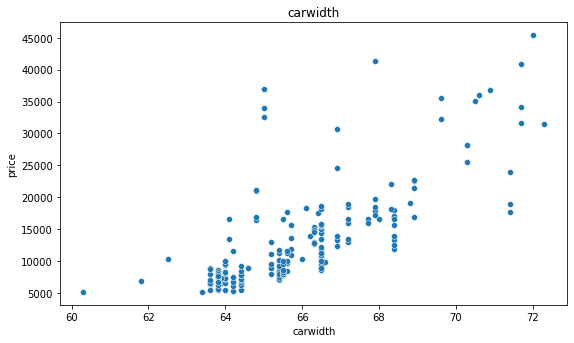

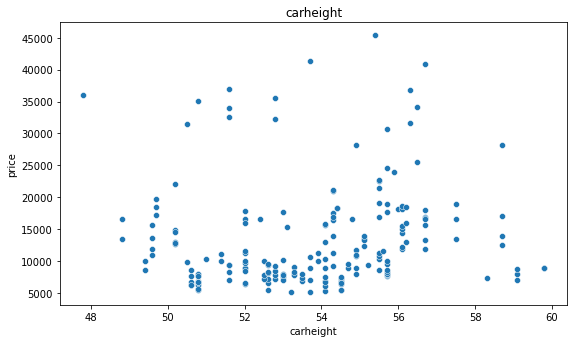

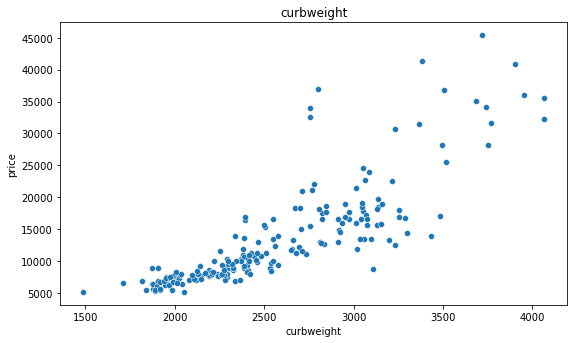

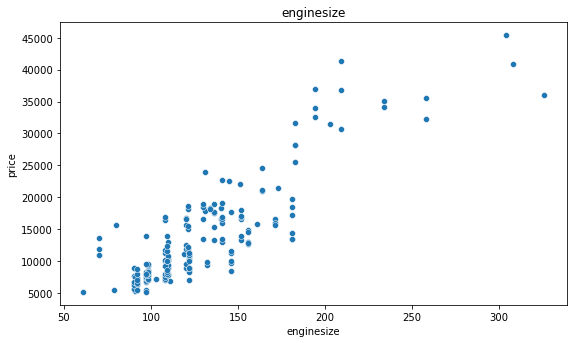

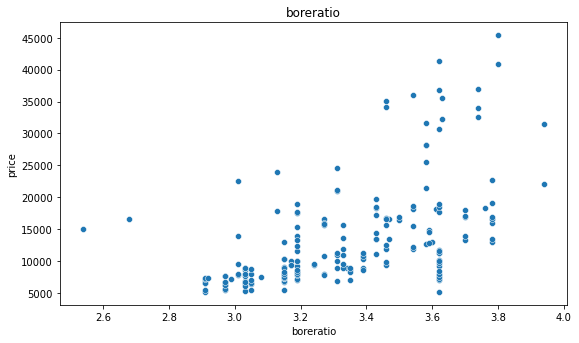

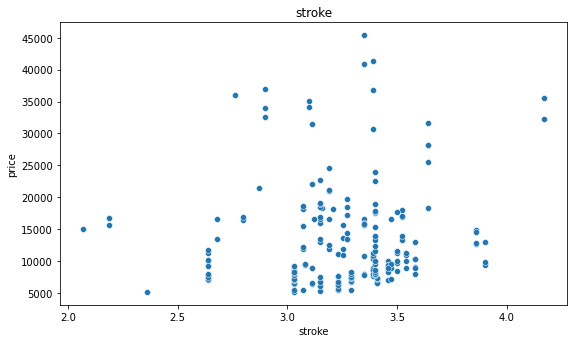

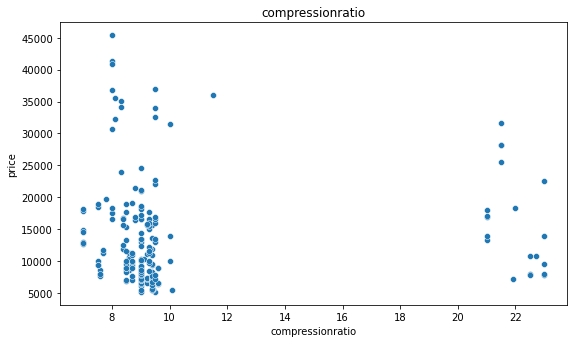

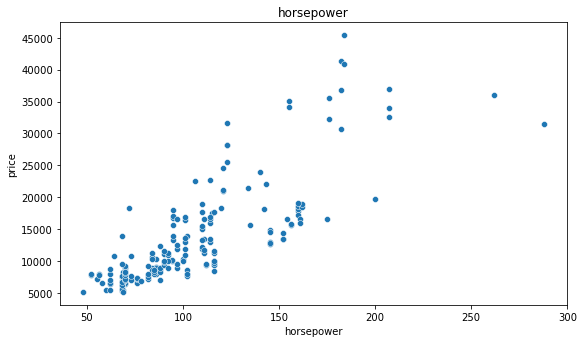

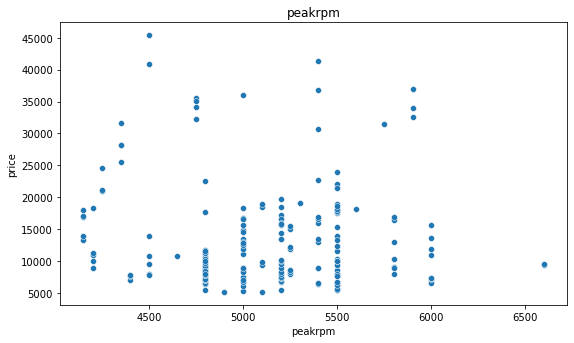

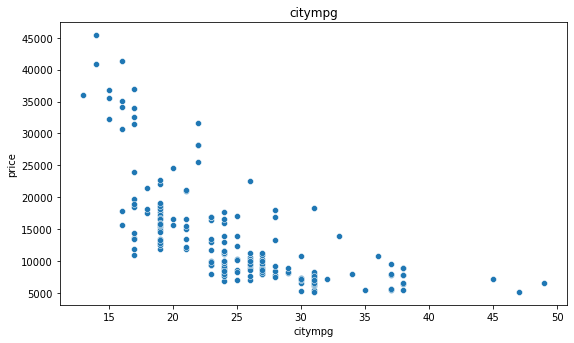

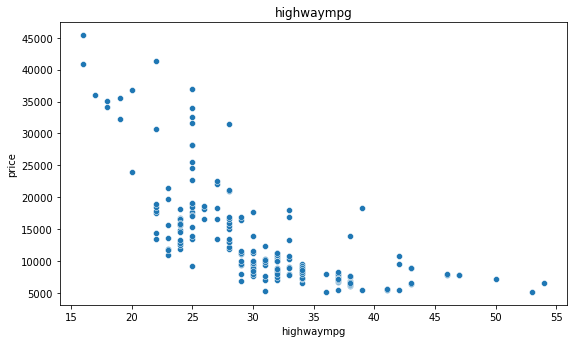

In [22]:
a = [make_plot(value, 1) for value in numerical_variables]

Insight: Most of the variables either have a positive or negative correlation with respect to price. However, from the graphs itself we cannot be sure about the exact correlation coefficient. Going, ahead we will calculate these numbers. For numerical features we will look at correlation matrix to drop features that are highliy correlated. Also, we look at VIF to examine multicollinearity and remove features that have multicollinearity. <br>
Features 'carheight', 'stroke', 'peakrpm', 'compressionratio' have very low correlation with 'price' and can be removed. 

In [23]:
print(cars[['price','carheight', 'stroke', 'peakrpm', 'compressionratio']].corr(method = 'pearson'))
numerical_variables = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', \
                       'boreratio', 'horsepower', 'citympg', 'highwaympg']

                     price  carheight    stroke   peakrpm  compressionratio
price             1.000000   0.119336  0.079443 -0.085267          0.067984
carheight         0.119336   1.000000 -0.055307 -0.320411          0.261214
stroke            0.079443  -0.055307  1.000000 -0.067964          0.186110
peakrpm          -0.085267  -0.320411 -0.067964  1.000000         -0.435741
compressionratio  0.067984   0.261214  0.186110 -0.435741          1.000000


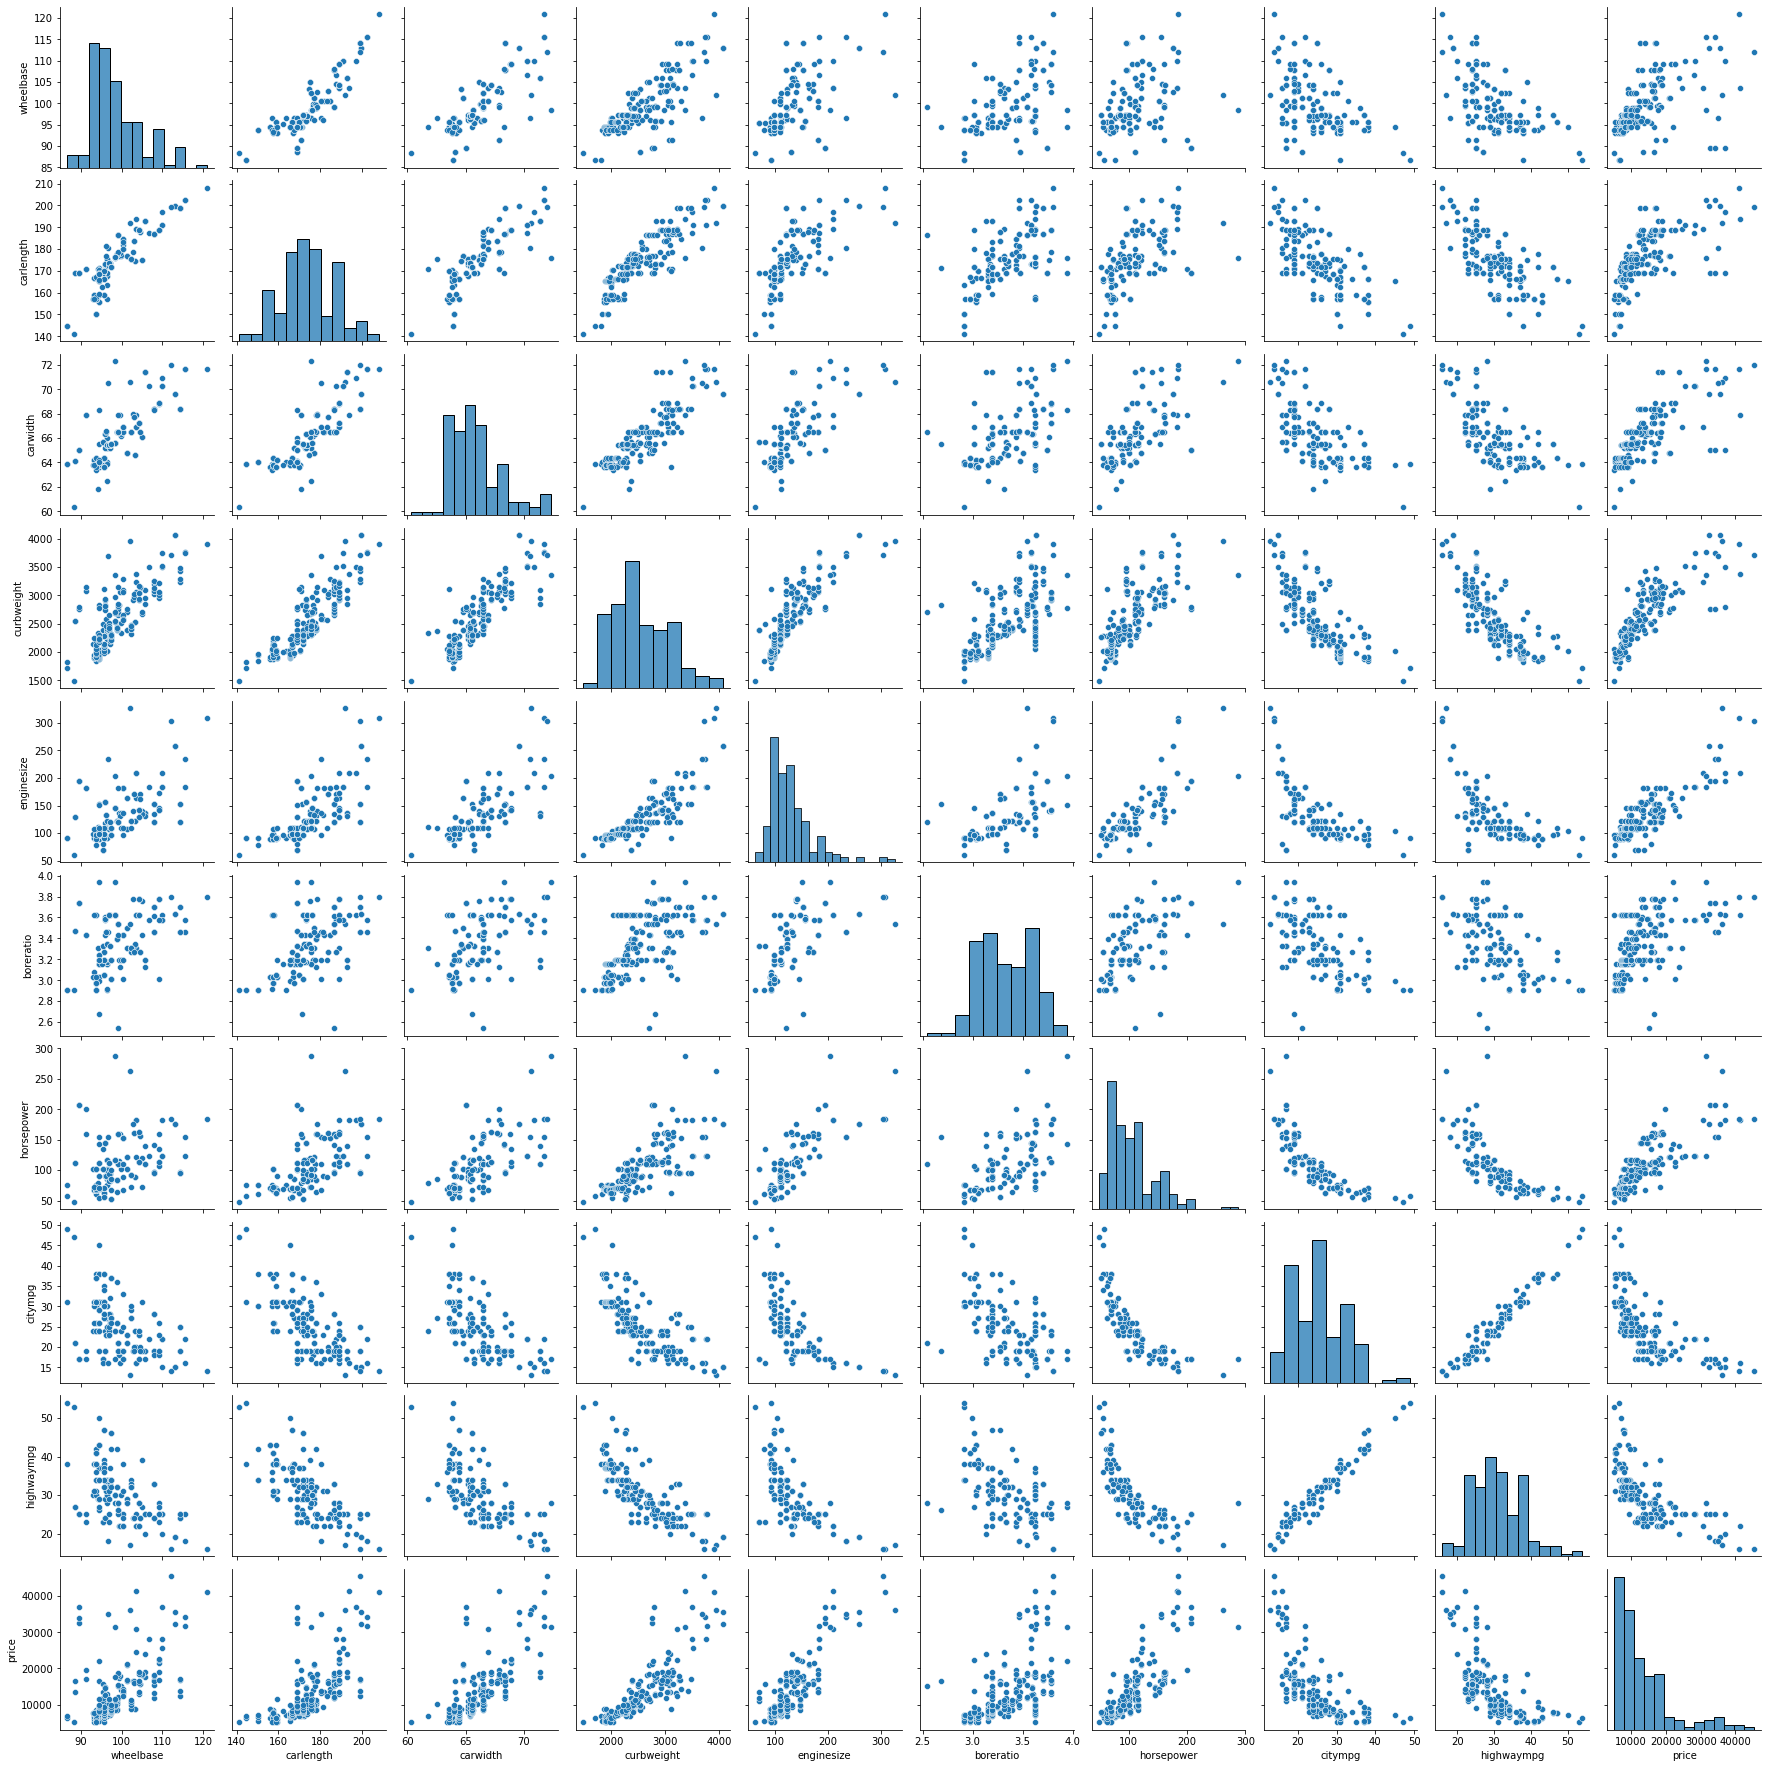

In [24]:
sns.pairplot(cars[numerical_variables + ['price']])

### 2. Identify relevant features (both categorical and numerical) <br>
[Feature Selection](https://www.youtube.com/watch?v=YaKMeAlHgqQ&t=699s) ||| [Feature Selection 2](https://www.youtube.com/watch?v=bFIM3AEKabU)

<b> Numerical Variables </b>

There are numerous ways of selecting numerical features 
1. Low Variance Analysis <br>
This technique consists of observing features with low variance (typically less than 5%) and rejecting such features since these features have values that are very close to each other. We can say that the numerical values in these features are almost constant. However, low variance analysis does not answer how two features are related to each other. It is hard for model to learn from this feature.
2. Pearson Correlation Coefficient <br>
This technique relies on correlation between two features to eliminate one of them. An important underlying assumption of linear regression is that features must have very low correlation amongst them. We usually reject features that have correlation greater than 75% threshold for this project. The threshold might change as per various business scenarios. If features have high correlation then one feature can be expressed in the form of other which often leads to decrease in model performance. However, pearson correlation coefficient works best with data showcasing linear relationship what about data with non-linear relationship.
3. Spearman Rank Correlation Coefficient <br>
Spearman Rank Correlation Coefficient often comes in handy when handy when the relationship between label and feature follows a more non-linear behaviour. However,spearman rank correlation in Python yields a p-value for each variable which can be used to gauge the significance of the variable. If p-value is less than 5% we keep that variable else reject the variable.

The above mentioned techniques alone are not sufficient in finalizing the final parameter for prediction of label. This is because the interactions between the features and the label change as variables are added and removed. However, you can perform the above checks to finally ensure there are no p-values that are greater than threshold and no features are highly correlated or have low variance.

<b> Low Variance </b> <br>
We will remove any features that variance lower than 1%.

In [25]:
var_dict = {value: statistics.variance(cars[value]) for value in numerical_variables}
var_dict

{'wheelbase': 36.261782400765185,
 'carlength': 152.20868818747007,
 'carwidth': 4.601899569583935,
 'curbweight': 271107.8743185079,
 'enginesize': 1734.1139167862266,
 'boreratio': 0.07335631276901006,
 'horsepower': 1563.7411286465806,
 'citympg': 42.79961740793878,
 'highwaympg': 47.42309899569584}

There are no variances less than 1%. 

<b> Pearson Correlation Coefficient </b>

[Link](https://stats.stackexchange.com/questions/445189/why-high-correlation-coefficient-doesnt-guarantee-high-vif#:~:text=As%20demonstrated%2C%20it%27s%20definitely%20possible%20to%20have%20a,have%20low%20pairwise%20correlations%2C%20but%20have%20high%20VIF%27s.) <br>
Pearson Correlation Coefficient oftens begs the question which feature to keep and which to remove. Answer, we should keep feature which has higher correlation with label.
    

<AxesSubplot:>

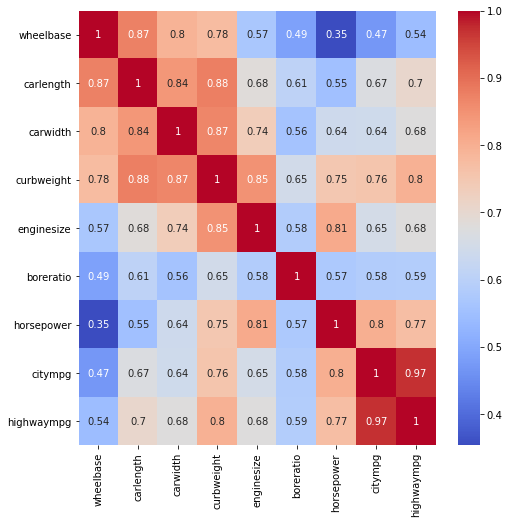

In [26]:
# Create Correlation Matrix
threshold = 0.85
correlation_matrix = cars[numerical_variables].corr(method = 'pearson').abs()
plt.figure(figsize=(8,8))
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm')

<b> [Variance Inflation Factor](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/#:~:text=Multicollinearity%20occurs%20when%20independent%20variables%20in%20a%20regression,you%20fit%20the%20model%20and%20interpret%20the%20results) </b> <br>
[Link1](https://statisticsbyjim.com/regression/variance-inflation-factors/) <br>
Variance Inflation Factor is used to detect the severity of multicollinearity in regression analysis. It varies between 1 and Inf and we usually reject feature if VIF is greater than 5.

In [27]:
# Variance Inflation Factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

checkVIF(cars[numerical_variables])

,Features,VIF
1,carlength,1753.38
0,wheelbase,1744.67
2,carwidth,1675.42
8,highwaympg,498.25
7,citympg,402.91
3,curbweight,272.49
5,boreratio,268.33
4,enginesize,55.00
6,horsepower,50.57


### Encoding of Categorical Variables

In [ ]:
# Perform Encoding on Data
cars_modified = cars[numerical_variables + categorical_variables + ['price']]
cars_modified[categorical_variables] = cars_modified[categorical_variables].astype('category')
cars_combined = pd.get_dummies(data = cars_modified, drop_first=True)
categorical_variables_encoded = list(cars_combined.columns)[10:]
cars_combined = sm.add_constant(cars_combined)

### Split data into training and test

In [29]:
# Split data into train and test
cars_train, cars_test = train_test_split(cars_combined, train_size = 0.75, random_state = 42)

<AxesSubplot:>

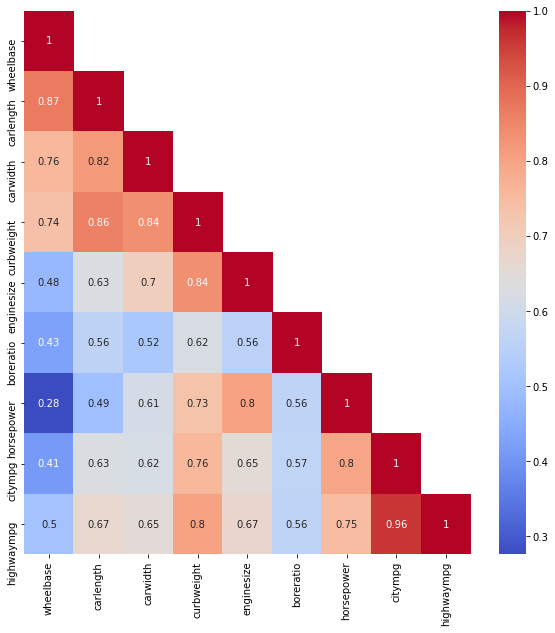

In [30]:
# Create correlation matrix
# MAKE THIS INTO FUNCTION
correlation_matrix = cars_train[numerical_variables].corr(method = 'pearson').abs()
lower_tri = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape)).astype(bool))
plt.figure(figsize=(10,10))
sns.heatmap(data = lower_tri, annot= True, cmap = 'coolwarm')

In [31]:
# Check VIF on training data
checkVIF(cars_train[numerical_variables])

,Features,VIF
1,carlength,1754.92
0,wheelbase,1702.77
2,carwidth,1533.97
8,highwaympg,464.10
7,citympg,370.83
3,curbweight,298.15
5,boreratio,251.79
4,enginesize,53.59
6,horsepower,47.27


### Scaling is not performed on label
Note: Scaling is performed after splitting data since we want to standardize considering that test and train data are treated independently of each other.

In [32]:
# Perform feature scaling for Numerical Variables (Standardization)
def standardization_function(df, col_name):
    if df[col_name].dtype ==  'uint8':  # ignore cateforical variables
        return df[col_name]
    elif col_name == 'price' or col_name == 'const':  # ignore label
        return df[col_name]
    else:
        mu = np.mean(df[col_name])
        std_dev = statistics.stdev(df[col_name])
        scaled_column = (df[col_name] - mu)/std_dev
        return scaled_column

cars_train_scaled = pd.DataFrame()
for col_name in list(cars_train.columns):
    cars_train_scaled[col_name] = standardization_function(cars_train, col_name)

In [33]:
# Perform feature scaling for Test Data Numerical Variables (Standardization)
cars_test_scaled = pd.DataFrame()
for col_name in list(cars_test.columns):
    cars_test_scaled[col_name] = standardization_function(cars_test, col_name)

# Simulation 1: With All Features 

In [34]:
# Create model with all features
model_all_features = sm.OLS(cars_train_scaled['price'], cars_train_scaled[['const'] + numerical_variables + categorical_variables_encoded])
result = model_all_features.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     87.78
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           1.16e-67
Time:                        10:28:32   Log-Likelihood:                -1318.9
No. Observations:                 153   AIC:                             2724.
Df Residuals:                     110   BIC:                             2854.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.904e+04   1786

In [35]:
# Predict price
y_pred = list(result.predict(cars_test_scaled[['const'] + numerical_variables + categorical_variables_encoded]))
y = list(cars_test_scaled['price'])

In [36]:
# Calculate rmse
def rmse(y, y_pred):
    sse = np.sum([(y[value] - y_pred[value])**2  for value in range(len(y))])
    rmse = np.sqrt(sse/len(y))
    return rmse

In [37]:
l_KPIs = [('None', 0,result.rsquared, result.fvalue, rmse(y, y_pred))]
l_KPIs

[('None', 0, 0.9710267120765217, 87.77620286011167, 2945.624127266577)]

In [ ]:
# Loop on features to drop based on highest p-value
features = ['const'] + numerical_variables + categorical_variables_encoded
len(features)

while ( any(value > 0.05 for value in result.pvalues) ):
    # Identify feature to drop
    max_p_value = result.pvalues.max()
    feature_to_drop = list(result.pvalues[result.pvalues == max_p_value].index)[0]
    # Drop feature from data
    if feature_to_drop != 'const':
        features.remove(feature_to_drop)
        cars_train.drop(feature_to_drop, inplace = True, axis = 1)
        cars_test.drop(feature_to_drop, inplace = True, axis = 1)
        cars_train_scaled.drop(feature_to_drop, inplace = True, axis = 1)
        cars_test_scaled.drop(feature_to_drop, inplace = True, axis = 1)
    # Rerun the model
    model_all_features = sm.OLS(cars_train_scaled['price'], cars_train_scaled[features])
    result = model_all_features.fit()
    # Predict the values
    y_pred = list(result.predict(cars_test_scaled[features]))
    # Track the KPIs
    l_KPIs.append((feature_to_drop, max_p_value, result.rsquared, result.fvalue, rmse(y, y_pred)))

In [39]:
# After dropping all insignificant features summary looks as below
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           3.11e-86
Time:                        10:28:32   Log-Likelihood:                -1341.5
No. Observations:                 153   AIC:                             2719.
Df Residuals:                     135   BIC:                             2774.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.576e+04    723.325     21.784      0.000    1.43e+04    1.72e+04
carwidth            1754.4165    298.605      5.875      0.000    1163.867    2344.966
curbweight          2812.8816    434.075      6.480      0.000    1954.414    3671.349
boreratio           -756.8864    227.540     -3.326      0.001   -1206.890    -306.883
horsepower          1713.6548    267.146      6.415      0.000    1185.323    2241.986
CarName_bmw         9563.5843    778.180     12.290      0.000    8024.583    1.11e+04
CarName_buick       1.138e+04   1056.724     10.767      0.000    9287.778    1.35e+04
CarName_jaguar      8672.4274   1184.930      7.319      0.000    6329.000     1.1e+04
CarName_mitsubishi -1575.1248    595.946     -2.643      0.009   -2753.722    -396.528
CarName_porsche     6399.9902   1427.401      4.484      0.000    3577.031    9222.949
CarName_subaru     -9774.5006   1936.372     -5.048      0.000   -1.36e+04   -5944.953
CarName_volvo       3383.6776    703.146      4.812      0.000    1993.072    4774.284
carbody_hatchback  -3575.8633    721.590     -4.956      0.000   -5002.946   -2148.781
carbody_sedan      -3373.0925    717.513     -4.701      0.000   -4792.112   -1954.073
carbody_wagon      -4774.7252    833.176     -5.731      0.000   -6422.491   -3126.959
drivewheel_rwd     -1140.6562    505.675     -2.256      0.026   -2140.726    -140.587
enginetype_ohcf     1.004e+04   1743.525      5.761      0.000    6596.450    1.35e+04
enginetype_rotor    3389.1622   1048.668      3.232      0.002    1315.221    5463.104
==============================================================================
Omnibus:                       12.878   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.086
Skew:                           0.363   Prob(JB):                     5.89e-06
Kurtosis:                       4.803   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Create lists
KPI_data = []
feature_dropped = []
p_value = [] 
R_Squared = []
F_Score = []
RMSE = []

for i in range(len(l_KPIs)):
    feature_dropped.append(l_KPIs[i][0])
    p_value.append(l_KPIs[i][1])
    R_Squared.append(l_KPIs[i][2])
    F_Score.append(l_KPIs[i][3])
    RMSE.append(l_KPIs[i][4])  

In [41]:
# Create dataframe with all KPIs
empty_dict = {'feature_dropped': feature_dropped,
              'p_value': p_value,
              'R_Squared': R_Squared,
              'F_Score': F_Score,
              'RMSE': RMSE
             }
metrics_df = pd.DataFrame(empty_dict)
metrics_df

,feature_dropped,p_value,R_Squared,F_Score,RMSE
0,None,0.000000,0.971027,87.776203,2945.624127
1,CarName_saab,0.984206,0.971027,90.734180,2944.469882
2,wheelbase,0.934861,0.971025,93.834553,2949.646332
3,CarName_isuzu,0.945766,0.971024,97.095708,2949.844706
4,CarName_audi,0.804772,0.971008,100.476514,2951.141495
5,carlength,0.668916,0.970961,103.924699,2950.229538
6,highwaympg,0.637790,0.970905,107.525705,2943.984389
7,CarName_mercury,0.505891,0.970793,111.111911,2933.324597
8,CarName_vw,0.403988,0.970618,114.649301,2924.482190
9,CarName_chevrolet,0.330782,0.970381,118.140609,2911.551489


<ipython-input-42-b36af4757485>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = metrics_df.feature_dropped, rotation=45, horizontalalignment='right')


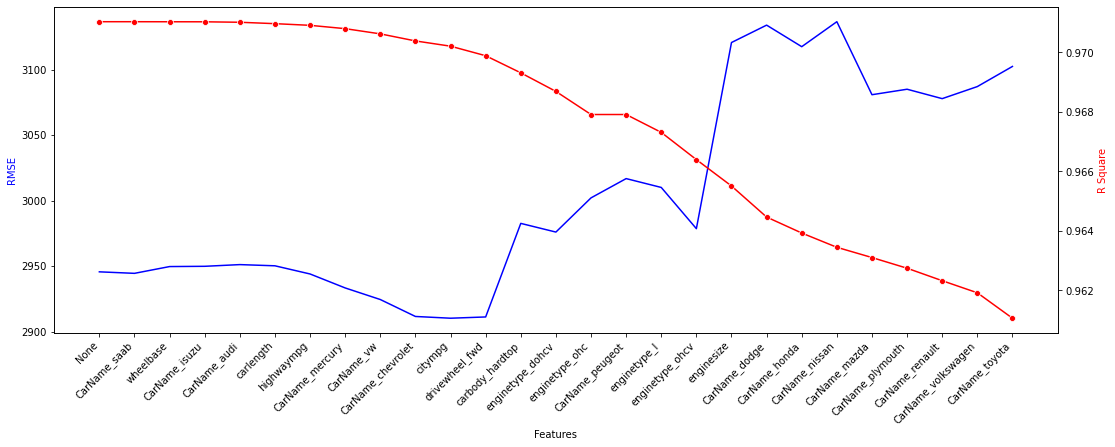

In [42]:
# Create plot to observe variation of RMSE and R_Square with each feature dropped
fig, ax1 = plt.subplots(figsize=(18,6)) # initializes figure and plots

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 

sns.lineplot(data = metrics_df, x = 'feature_dropped', y = 'RMSE', ax = ax1, color = 'blue') # plots the first set of data, and sets it to ax1. 
sns.lineplot(data = metrics_df, x = 'feature_dropped', y = 'R_Squared', marker = 'o', color = 'red', ax = ax2) # plots the second set, and sets to ax2. 

# these lines add the annotations for the plot. 
ax1.set_xlabel('Features')
ax1.set_ylabel('RMSE', color='b')
ax2.set_ylabel('R Square', color='r')
ax1.set_xticklabels(labels = metrics_df.feature_dropped, rotation=45, horizontalalignment='right')
plt.show(); # shows the plot. 

#### From the above graph, we can see that RMSE is minimum when considering only fetures removed up to 'citympg'. Based on the business scenarios and model complexity we can either target a lower RMSE or go for a less complex model as done here which targets more significant variables. Also, we can see that dropping 'enginesize' greatly increases the MSE and it is not a best judgement call to drop features that increase MSE substantially.

#### Other techniques for creating linear models with best features are as belows. This implementation will be a part of separate project and same dataset as used here.

There are other techniques as well which can be used for feature selection specially . These are:
1. Forward Selection <br>
For this technique, we start with no features and insert features into the model one-by-one. First, the feature with the highest correlation is included. A disadvantage with forward selection is that a feature that makes it into the model is not dropped. It might happen that as newer features are added, the significance of existing features drops (or, p-value increases beyond 5%).
2. Backward Elimination <br>
For this technique, we start with all features in the model.  The p-value is calculated as we remove regressors one at a time.  In this case, the feature with the highest p-value is removed from the model ands the procedure continues until the largest p-value is smaller than the pre-selected cutoff value (5%), and terminates otherwise.  This method sounds particularly appealing, when we’d like to see how each variable affects the model.
3. Recursive Feature Elimination (RFE)

https://stats.stackexchange.com/questions/138860/is-using-correlation-matrix-to-select-predictors-for-regression-correct
    